## Random Forest Regression on mRNA splicing efficiency

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

/home/ghristov/miniconda3/envs/mlp/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'features.csv')
gene_features = pd.read_csv(data_path, delimiter = ',')

print('Number of data points: {}. Number of attributes: {}'.format(gene_features.shape[0],gene_features.shape[1]))

Number of data points: 117. Number of attributes: 101


In [3]:
gene_features.head(8)

,ORG,Gene,AUC,Gene len (bp),Exon1 len (bp),Exon2 len (bp),Intron len (bp),5ss-BP len (bp),BP-3ss len (bp),"ΔG per bp, intron",...,GUC,CUC,AGC,UGC,GGC,CGC,ACC,UCC,GCC,CCC
0,YFL039C,ACT1,0.481,1437,10,1118,309,266,44,-0.161,...,0.007,0.020,0.003,0.020,0.003,0.003,0.013,0.013,0.000,0.010
1,YDL029W,ARP2,0.235,1299,22,1154,123,109,15,-0.227,...,0.000,0.025,0.008,0.025,0.017,0.000,0.017,0.000,0.017,0.033
2,YML036W,CGI121,0.740,652,456,90,106,65,42,-0.092,...,0.000,0.010,0.010,0.000,0.000,0.000,0.029,0.010,0.010,0.000
3,YBL059C-A,CMC2,0.856,415,34,296,85,57,29,-0.074,...,0.000,0.024,0.000,0.024,0.000,0.000,0.000,0.036,0.012,0.024
4,YKL190W,CNB1,0.499,604,52,476,76,58,19,-0.143,...,0.000,0.000,0.000,0.000,0.000,0.000,0.014,0.000,0.000,0.000
5,YLL050C,COF1,0.483,611,14,418,179,47,133,-0.228,...,0.006,0.028,0.006,0.011,0.000,0.006,0.000,0.023,0.006,0.006
6,YIL111W,COX5B,0.219,544,1,455,88,57,32,-0.125,...,0.000,0.000,0.012,0.012,0.000,0.000,0.000,0.012,0.000,0.000
7,YNL130C,CPT1,0.586,1274,50,1132,92,58,35,-0.076,...,0.000,0.000,0.000,0.022,0.011,0.000,0.011,0.000,0.000,0.011


In [7]:
X = gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
y = gene_features['AUC']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

KeyboardInterrupt: 

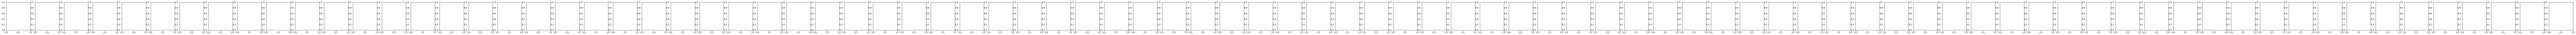

In [9]:
variable_names = X.columns.values
sns.pairplot(gene_features, x_vars=variable_names, y_vars='AUC')

In [10]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)

In [11]:
lr = LinearRegression()
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)
predictions = cross_val_predict(lr,X,y=y,cv=kf)

print('Coefficient of determination: {}'.format(r2_score(y, predictions)))
print('Mean absolute error: {}'.format(mean_absolute_error(y, predictions)))
print('Root mean squared error: {}'.format(np.sqrt(mean_squared_error(y, predictions))))

Coefficient of determination: -7.2183020153338795
Mean absolute error: 0.47025816832414663
Root mean squared error: 0.6546933285937656


In [13]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)
print('\n')
rfr = RandomForestRegressor()
predictions_rfr = cross_val_predict(rfr,X,y=y,cv=kf)

print('RandomForestRegressor R^2: {}'.format(r2_score(y, predictions_rfr)))
print('RandomForestRegressor MAE: {}'.format(mean_absolute_error(y, predictions_rfr)))
print('RandomForestRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr))))
print('RandomForestRegressor CC: \n{}'.format(np.corrcoef(y, predictions_rfr)))



RandomForestRegressor R^2: 0.2623971484476886
RandomForestRegressor MAE: 0.14556495726495725
RandomForestRegressor RMSE: 0.19613638221235352
RandomForestRegressor CC: 
[[ 1.          0.52860548]
 [ 0.52860548  1.        ]]


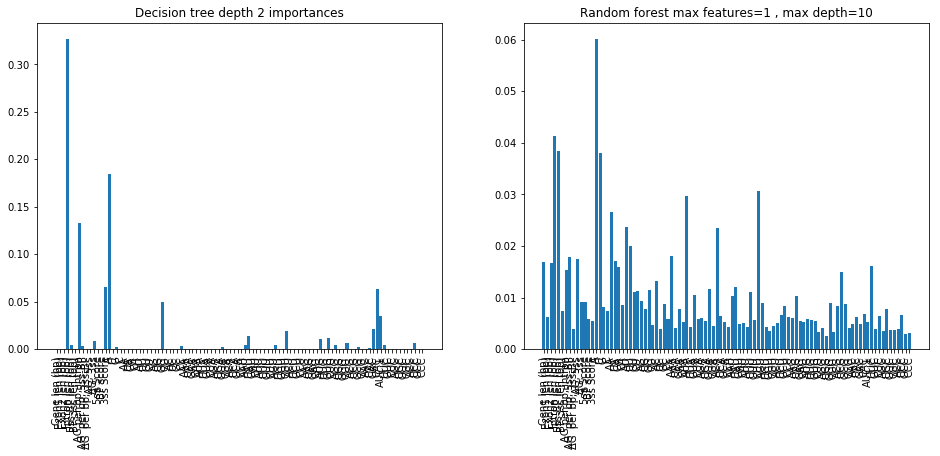

In [28]:
dt = DecisionTreeRegressor(criterion='mse', max_depth=15, random_state=1337)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=1000, 
                            criterion='mse', 
                            max_features=10, 
                            max_depth=15, 
                            n_jobs=2,
                            random_state=1337)

rf.fit(X_train, y_train)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
xx = np.arange(len(dt.feature_importances_))
ax1.bar(xx, dt.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Decision tree depth 2 importances')
ax2.bar(xx, rf.feature_importances_)
ax2.set_xticks(xx)
ax2.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax2.set_title('Random forest max features=1 , max depth=10')

#for i, column in enumerate(gene_features.drop(['ORG','Gene','AUC'], axis=1)):
#    print('Importance of feature {}, DT: {:.3f}, RF: {:.3f}'.format(column, dt.feature_importances_[i], rf.feature_importances_[i]))

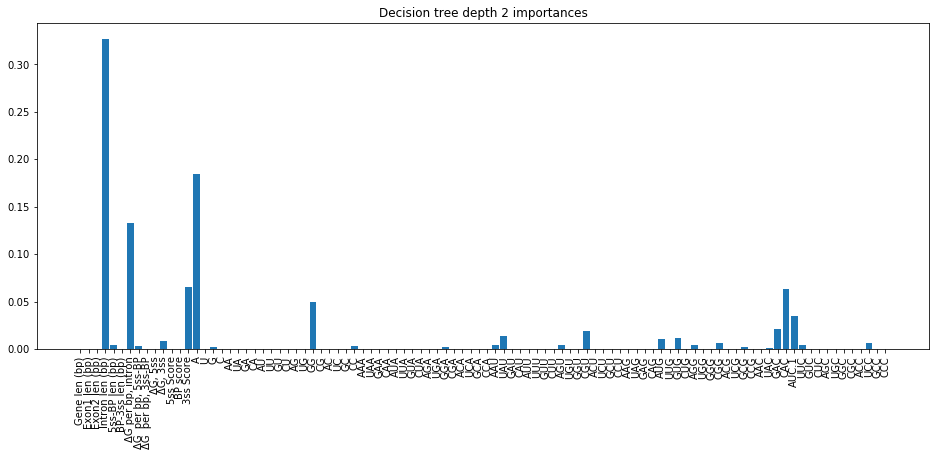

In [19]:
fig, ax1 = plt.subplots(figsize=(16,6))
xx = np.arange(len(dt.feature_importances_))
ax1.bar(xx, dt.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Decision tree depth 2 importances')

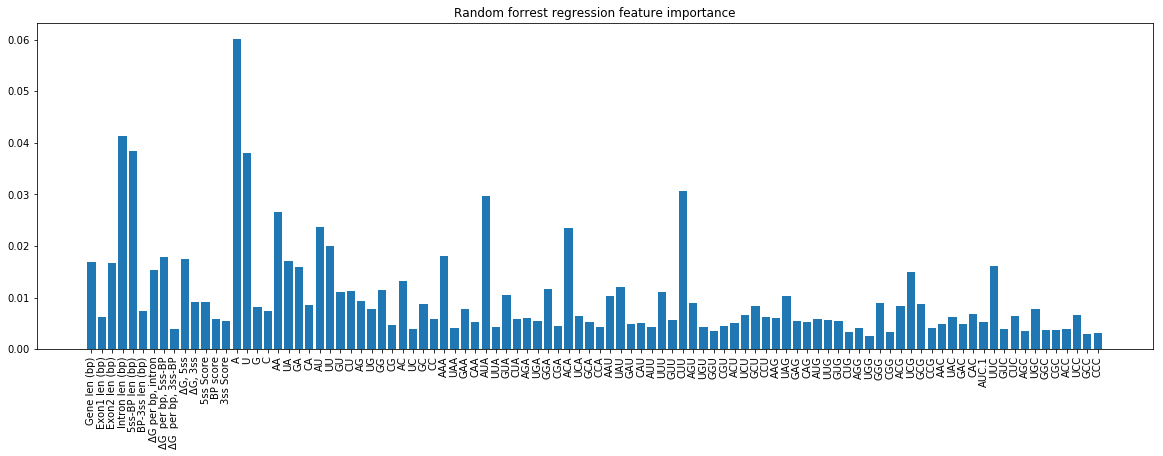

In [29]:
fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rf.feature_importances_))
ax1.bar(xx, rf.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Random forrest regression feature importance')

fig.savefig('Project_features_importance.pdf',bbox_inches = 'tight')

In [13]:
def fit_scatter(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Observed AUC')
    ax.set_ylabel('Predicted AUC')
    ax.set_title('')

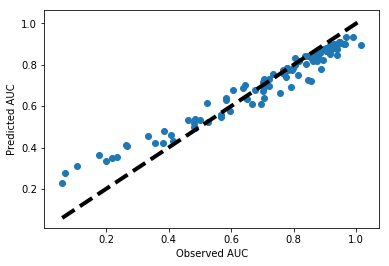

In [14]:
fit_scatter(y_train, rf.predict(X_train))

In [19]:
data_path_2 = os.path.join(os.getcwd(), 'datasets', 'HMM_table_minus.csv')
data_path_3 = os.path.join(os.getcwd(), 'datasets', 'HMM_table_plus.csv')
data_path_4 = os.path.join(os.getcwd(), 'datasets', 'mart_export.csv')

hmm_table_minus = pd.read_csv(data_path_2, delimiter = '\t')
hmm_table_plus = pd.read_csv(data_path_3, delimiter = '\t')
gene_info = pd.read_csv(data_path_4, delimiter = ',')
    
print('Number of data points: {}. Number of attributes: {}'.format(hmm_table_plus.shape[0],hmm_table_plus.shape[1]))

Number of data points: 603559. Number of attributes: 6


In [22]:
hmm_table_plus.head(10)

,#TABLE,Rpo21_S2IP.table_plus,Rpo21_S5IP.table_plus,Rpo21_S7IP.table_plus,Rpo21_T4IP.table_plus,Rpo21_Y1IP.table_plus
0,chrI_1_+,0.0,0.0,0.0,0.0,0.000000
1,chrI_21_+,0.0,0.0,0.0,0.0,0.000000
2,chrI_41_+,0.0,0.0,0.0,0.0,0.000000
3,chrI_61_+,0.0,0.0,0.0,0.0,0.000000
4,chrI_81_+,0.0,0.0,0.0,0.0,0.016644
5,chrI_101_+,0.0,0.0,0.0,0.0,0.067899
6,chrI_121_+,0.0,0.0,0.0,0.0,0.053452
7,chrI_141_+,0.0,0.0,0.0,0.0,0.000000
8,chrI_161_+,0.0,0.0,0.0,0.0,0.000000
9,chrI_181_+,0.0,0.0,0.0,0.0,0.000000


In [21]:
hmm_table_minus.head(10)

,#TABLE,Rpo21_S2IP.table_minus,Rpo21_S5IP.table_minus,Rpo21_S7IP.table_minus,Rpo21_T4IP.table_minus,Rpo21_Y1IP.table_minus
0,chrI_1_-,0.000000,0.000000,0.000000,0.000000,0.000000
1,chrI_21_-,0.000000,0.000000,0.000000,0.000000,0.000000
2,chrI_41_-,-0.144050,-0.144050,-0.144050,-0.144050,-0.144050
3,chrI_61_-,-0.025421,-0.025421,-0.025421,-0.025421,-0.025421
4,chrI_81_-,0.000000,0.000000,0.000000,0.000000,0.000000
5,chrI_101_-,0.224045,0.000000,0.000000,0.000000,0.000000
6,chrI_121_-,0.000000,0.000000,0.000000,0.000000,0.000000
7,chrI_141_-,0.000000,0.000000,0.000000,0.000000,0.000000
8,chrI_161_-,0.000000,0.000000,0.000000,0.000000,0.000000
9,chrI_181_-,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
gene_info.head(50)

,Gene stable ID,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene name,Strand
0,YAL030W,87286,87752,I,SNC1,1
1,YBL026W,170623,171038,II,LSM2,1
2,YBL027W,168423,169376,II,RPL19B,1
3,YBL040C,142112,142868,II,ERD2,-1
4,YBL059C-A,110125,110539,II,CMC2,-1
5,YBL087C,59822,60739,II,RPL23A,-1
6,YBR048W,332831,333812,II,RPS11B,1
7,YBR082C,406628,407169,II,UBC4,-1
8,YBR084C-A,414186,415261,II,RPL19A,-1
9,YBR181C,591712,592774,II,RPS6B,-1
